# Bisection Method

Bisection method is the simplest algorithm for root finding problem(solving $f(x) = 0$).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/1024px-Bisection_method.svg.png?1568466168904" width=400>

## Prerequisites

1. Require a given interval $[a, b]$ in which $f(x)$ satisfies $f(a) \cdot f(b) < 0$.
2. $f \in C^{0}[a,b]$, i.e. $f$ is continous in $[a,b]$.

> Failed cases: $f(x)=x^2$, $f(x)=0$

## Existence of Root

Following the prerequisites above, a solution of the equation $f(x)=0$ is guarantted by the [Intermediate Value Theorem](https://www.wikiwand.com/en/Intermediate_value_theorem).

## Algorithm

1. Find an initial interval $[a, b]$ such that $f$ has a sign change in it, 
2. Evaluate $f$ at the midpoint $c = \frac{a+b}{2}$.
3. Consider 3 cases below,
    1. If $f(a) \cdot f(c) < 0$, then let the next interval $[a_{\text{next}}, b_{\text{next}}]=[a, c]$.
    2. If $f(c) \cdot f(b) < 0$, then let the next interval $[a_{\text{next}}, b_{\text{next}}]=[c, b]$.
    3. Otherwise, $f(c) = 0$, then the solution has been found. Return $c$ as a solution. 
4. Use $[a_{\text{next}}, b_{\text{next}}]$ as a new interval and repeat _steps 2, 3_ until some criterions satisfied. (For instance, max iterations, error tolerance, etc.)
5. Return $c=\frac{a_{\text{next}} + b_{\text{next}}}{2}$ as an approximated solution.

## Implementation

### Part 0. Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Implement the iteration process of halving intervals.

In [2]:
def bisection(func, interval):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
        
    Returns
    -------
    result: float
        Approximation of the root.
    '''
    
    # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'
    
    a_next, b_next = a, b
    
    while True:
        # Find midpoint
        c = (a_next + b_next) / 2

        # Halve the interval
        value_of_func_c = func(c)
        if func(a_next) * value_of_func_c < 0:
            a_next = a_next
            b_next = c
        elif value_of_func_c * func(b_next) < 0:
            a_next = c
            b_next = b_next
        else:
            return c

# Check 1: solve f(x) = x = 0 in [-1, 1]
print(bisection(lambda x: x, [-1, 1]))

# Check 2: solve f(x) = x = 0 in [0.5, 1]
print(bisection(lambda x: x, [0.5, 1]))

0.0


AssertionError: This initial interval does not satisfied the prerequisites!

### Found a bug!

Sometimes the function may be hard to find its exact solution. Endless loop will make computer __stuck__!

For example, solving

$$f(x) = x^3 + x + 1 = 0 \text{ on } [-1, 1].$$

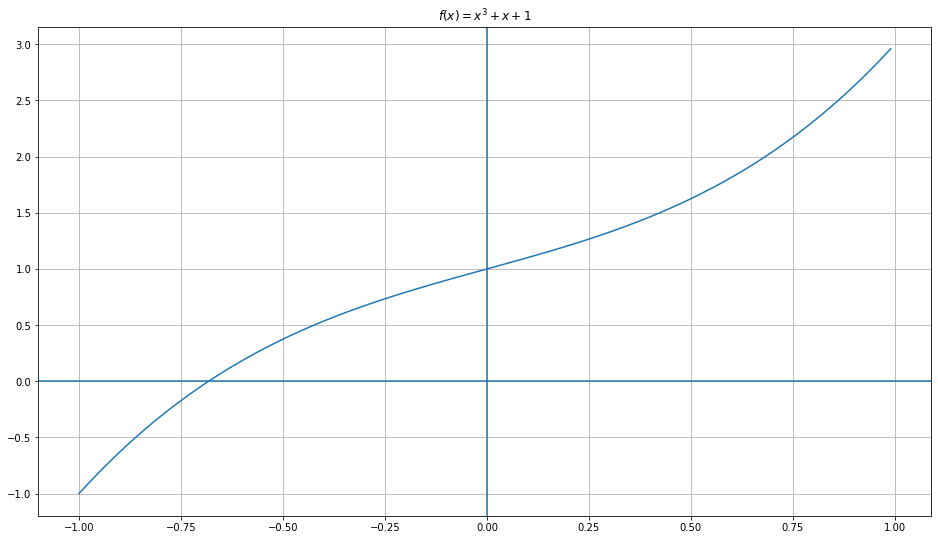

In [3]:
# Visualize f(x) on [-1, 1]

f = lambda x: x**3 + x + 1
search_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x) = x^3 + x + 1$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

In [4]:
# Check 3: solve f(x) = x^3 + x + 1 = 0 in [-1, 1]
print(bisection(lambda x: x**3 + x + 1, [-1, 1]))

KeyboardInterrupt: 

> **NOTE**: You can stop the running process by pressing the __stop button__ on the tools bar above.

### Part 2: Avoid endless loop by limiting the amount of iterations

In [6]:
def bisection(
    func,
    interval,
    max_iterations=5
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    result: float
        Approximation of the root.
    '''

    # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'

    num_iterations = 0
    a_next, b_next = a, b

    while True:

        # Find midpoint
        c = (a_next + b_next) / 2

        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1

            # Halve the interval
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            else:
                return c
        else:
            print('Terminate since reached the maximum iterations.')
            return c

# Check 3: solve f(x) = x^3 + x + 1 = 0 in [-1, 1]
print(bisection(lambda x: x**3 + x + 1, [-1, 1], max_iterations=20))

Terminate since reached the maximum iterations.
-0.6823282241821289


### Part 3: Improve the termination condition by introducing error tolerance

The error estimation $e$ in the $n$-th iteration(interval $[a_n, b_n]$) of the bisection method can be derived by

$$e \leq \left|\frac{b_n - a_n}{2}\right|.$$

In [7]:
def bisection(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.

    Returns
    -------
    result: float
        Approximation of the root.
    '''

    # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'

    num_iterations = 0
    a_next, b_next = a, b

    while True:

        # Find midpoint
        c = (a_next + b_next) / 2

        # Evaluate the error
        error = (b_next - a_next) / 2
        if error < tolerance:
            print('The approximation has satisfied the tolerance.')
            return c

        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1

            # Halve the interval
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            else:
                return c
        else:
            print('Terminate since reached the maximum iterations.')
            return c

## Example

The positive root of 

$$f(x) = x^2 - x - 1 = 0$$

is called the [Golden Ratio](https://www.wikiwand.com/en/Golden_ratio) denoted by 

$$\phi = \frac{1+\sqrt{5}}{2} \approx 1.618.$$

<img src="https://www.canva.com/learn/wp-content/uploads/2015/10/14-tb-800x0.png" width=400>

### Step1. Construct the target function.

In [3]:
def f(x):
    return x**2 - x - 1

### Step2. Find the initial interval

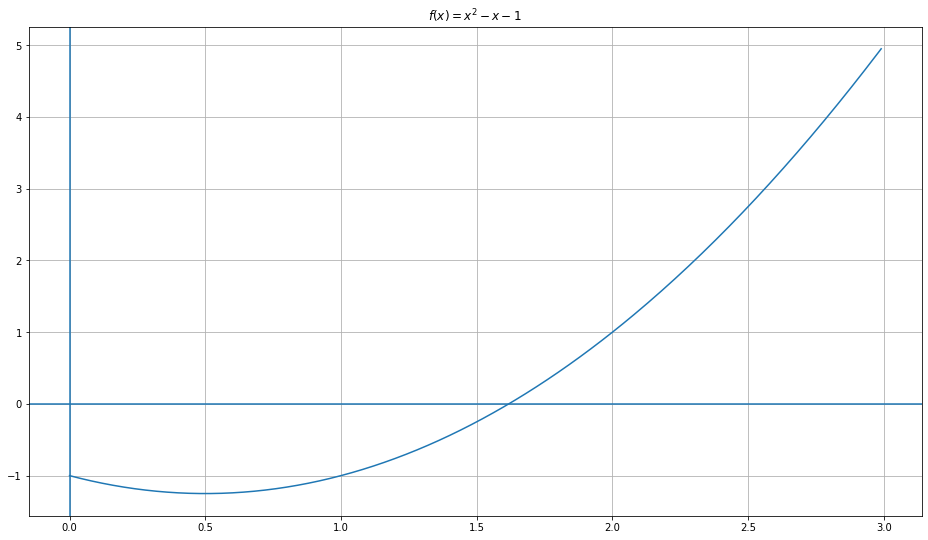

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
search_range = np.arange(0, 3, 0.01)
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x) = x^2 - x - 1$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Step3. Start solving!

In [4]:
my_initial_interval = [1.0,2.0] 

solution = bisection(
    f, 
    my_initial_interval,
    max_iterations=30,
)
print(solution)

NameError: name 'bisection' is not defined

### Let's compare with the exact solution

In [7]:
exact_solution = (1 + np.sqrt(5)) / 2
print('The error is', abs(solution - exact_solution))

The error is 4.3189439580260114e-08


## Error Analysis

Furthermore, we can store the history of solving process to study the convergence behavior of this method.

In [5]:
def bisection(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''

    # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'

    num_iterations = 0
    a_next, b_next = a, b

    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}

    while True:

        # Find midpoint
        c = (a_next + b_next) / 2

        # Evaluate the error
        error = (b_next - a_next) / 2

        if report_history:
            history['estimation'].append(c)
            history['error'].append(error)

        if error < tolerance:
            print('The approximation has satisfied the tolerance.')
            return c, history if report_history else c

        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1

            # Halve the interval
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            else:
                return c, history if report_history else c
        else:
            print('Terminate since reached the maximum iterations.')
            return c, history if report_history else c

In [6]:
solution, history = bisection(
    f, 
    my_initial_interval,
    max_iterations=100,
    tolerance=1e-7,
    report_history=True
)
print(solution)

The approximation has satisfied the tolerance.
1.6180339455604553


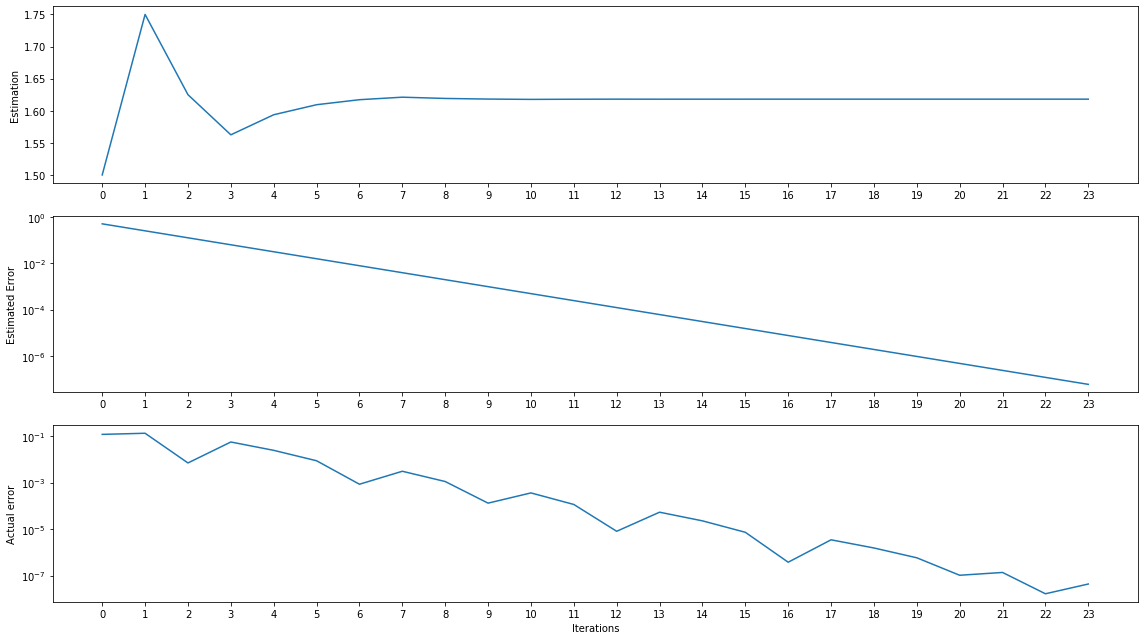

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(16, 9))
ax1, ax2, ax3 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

actual_error = np.abs(history['estimation']-exact_solution)
ax3.plot(iterations, actual_error)
ax3.set_ylabel('Actual error')
ax3.set_yscale('log')
ax3.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

## Verify the theoretical minimal iterations for desired tolerance 

Suppose given the tolerance $\epsilon=10^{-7}$.

The minimal iterations $n$ to converge started from the interval $[1, 2]$ can be derived by

$$|error| < \frac{|b-a|}{2^{n+1}} \implies 10^{-7} < \frac{2-1}{2^{n+1}} \implies n > \log_2(10^7)-1 \implies n \geq 23.$$



In [15]:
np.log(10**7)/np.log(2) -1

22.25349666421154

In [23]:
print(actual_error[-3] < 1e-7)

False
